<center>
<img src="https://image.ajunews.com/content/image/2021/01/25/20210125181044427167.png" width="200" height="200"><br>
</center>

# 시계열 분석을 통한 삼성전자 주가 예측 with Transformer

삼성전자의 주가를 통계적 방법론부터 딥러닝 방법론까지 다양한 방법을 통해 예측하고자 한다.
이 프로젝트는 Transformer를 사용하여 Time Series Data Forecasting을 해보고자 한다.

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
# matplotlib 설정
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Load Data

yfinance API를 사용하여 2017-01-01 ~ 2022-01-20까지의 삼성전자 주가 데이터를 불러왔다.

In [3]:
import yfinance as yf

samsung_df = yf.download('005930.KS',
                      start='2017-01-01',
                      end='2022-02-01',
                      progress=False)
samsung_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,35980.0,36240.0,35880.0,36100.0,31327.474609,4650600
2017-01-03,36280.0,36620.0,36020.0,36480.0,31657.232422,7357650
2017-01-04,36500.0,36520.0,36100.0,36160.0,31379.542969,7971750
2017-01-05,36060.0,36060.0,35540.0,35560.0,30858.865234,10967450
2017-01-06,36180.0,36440.0,36040.0,36200.0,31414.251953,8880950
...,...,...,...,...,...,...
2022-01-24,75400.0,75800.0,74700.0,75100.0,75100.000000,13691134
2022-01-25,74800.0,75000.0,73200.0,74000.0,74000.000000,17766704
2022-01-26,74000.0,74000.0,74000.0,74000.0,74000.000000,0


In [4]:
samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'open', 'high', 'low', 'close', 'adj close', 'volume']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,open,high,low,close,adj close,volume
day,,,,,,
2017-01-02,35980.0,36240.0,35880.0,36100.0,31327.474609,4650600
2017-01-03,36280.0,36620.0,36020.0,36480.0,31657.232422,7357650
2017-01-04,36500.0,36520.0,36100.0,36160.0,31379.542969,7971750
2017-01-05,36060.0,36060.0,35540.0,35560.0,30858.865234,10967450
2017-01-06,36180.0,36440.0,36040.0,36200.0,31414.251953,8880950
...,...,...,...,...,...,...
2022-01-24,75400.0,75800.0,74700.0,75100.0,75100.000000,13691134
2022-01-25,74800.0,75000.0,73200.0,74000.0,74000.000000,17766704
2022-01-26,74000.0,74000.0,74000.0,74000.0,74000.000000,0


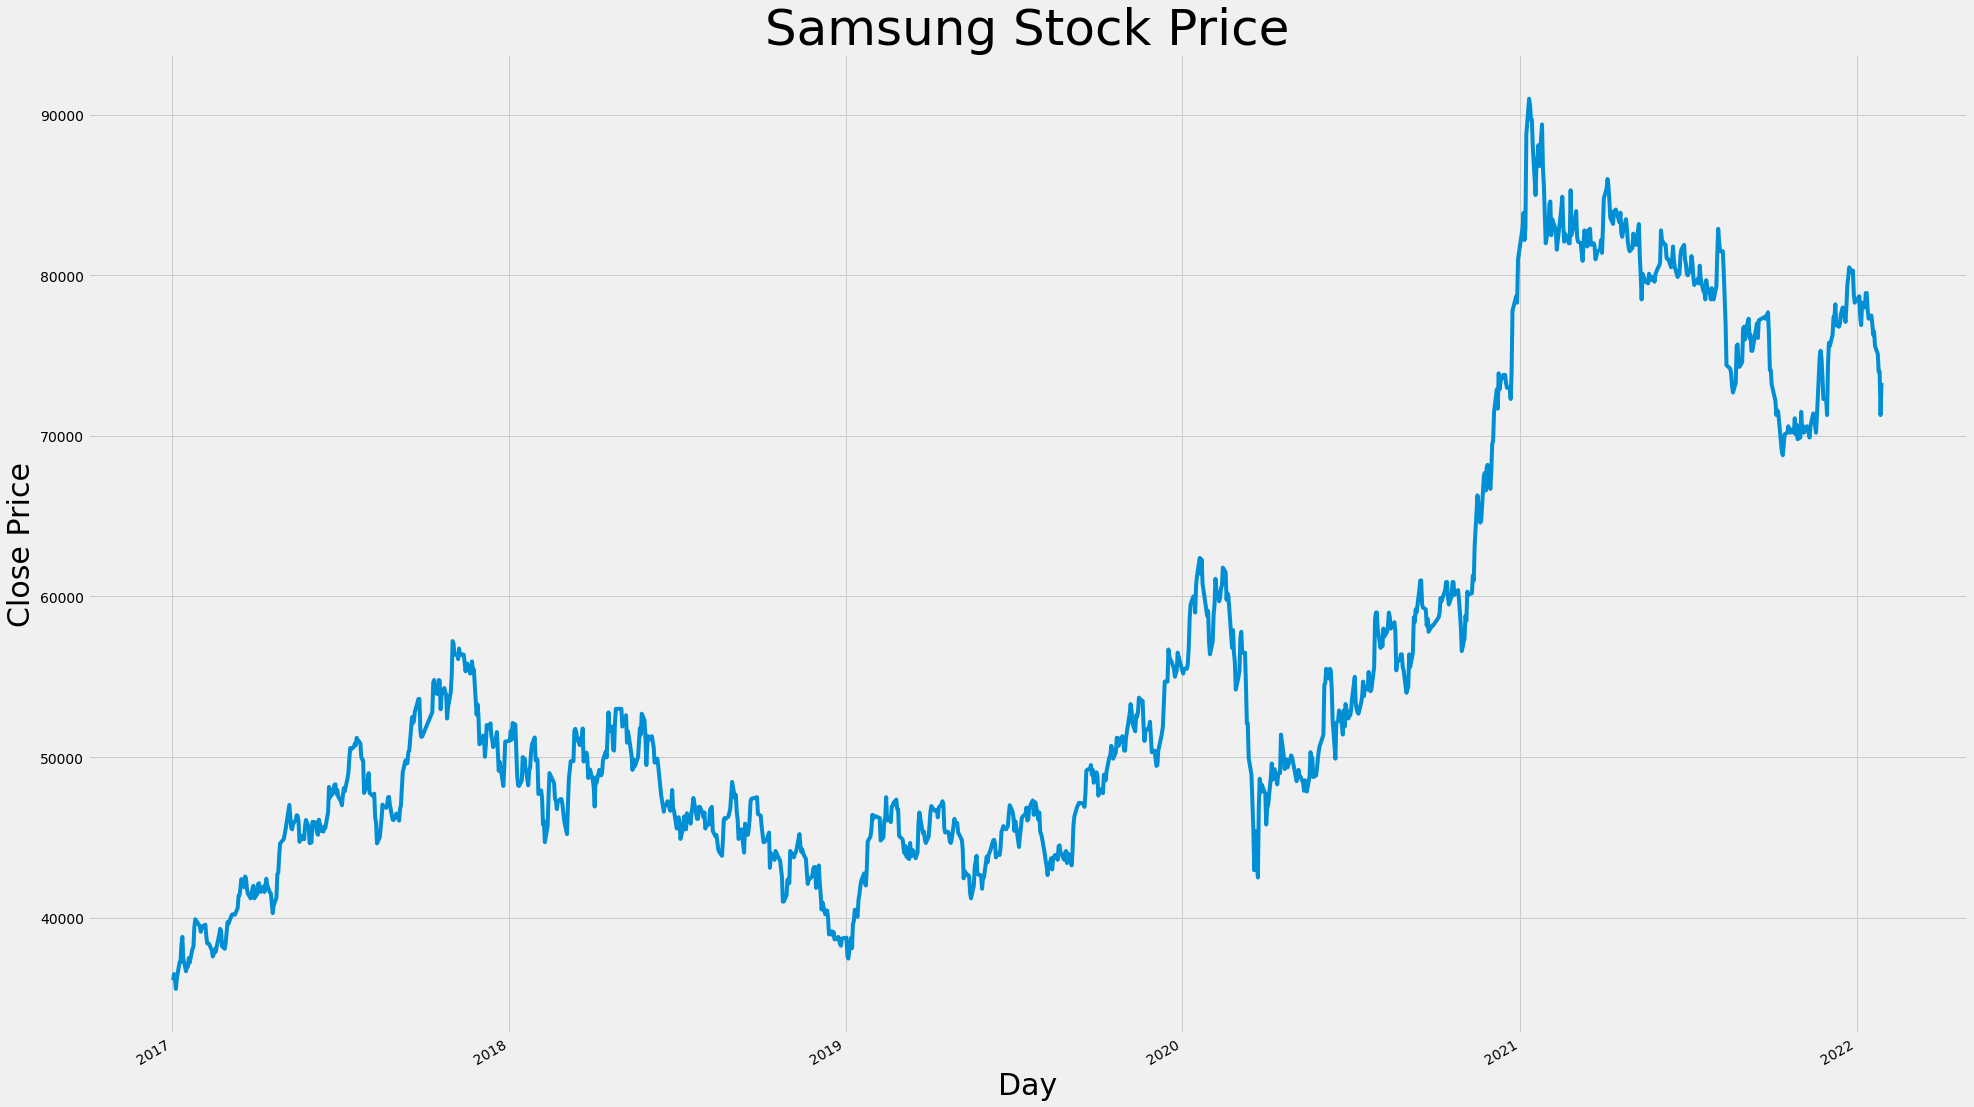

In [5]:
fig, ax = plt.subplots(figsize=(30, 20))
samsung_df['close'].plot(ax=ax)
plt.title("Samsung Stock Price",fontsize=50)
plt.xlabel('Day', fontsize=30)
plt.ylabel('Close Price', fontsize=30)
plt.show()

In [6]:
samsung_df['log_close'] = np.log(samsung_df['close'])
samsung_df

,open,high,low,close,adj close,volume,log_close
day,,,,,,,
2017-01-02,35980.0,36240.0,35880.0,36100.0,31327.474609,4650600,10.494048
2017-01-03,36280.0,36620.0,36020.0,36480.0,31657.232422,7357650,10.504519
2017-01-04,36500.0,36520.0,36100.0,36160.0,31379.542969,7971750,10.495709
2017-01-05,36060.0,36060.0,35540.0,35560.0,30858.865234,10967450,10.478977
2017-01-06,36180.0,36440.0,36040.0,36200.0,31414.251953,8880950,10.496814
...,...,...,...,...,...,...,...
2022-01-24,75400.0,75800.0,74700.0,75100.0,75100.000000,13691134,11.226576
2022-01-25,74800.0,75000.0,73200.0,74000.0,74000.000000,17766704,11.211820
2022-01-26,74000.0,74000.0,74000.0,74000.0,74000.000000,0,11.211820


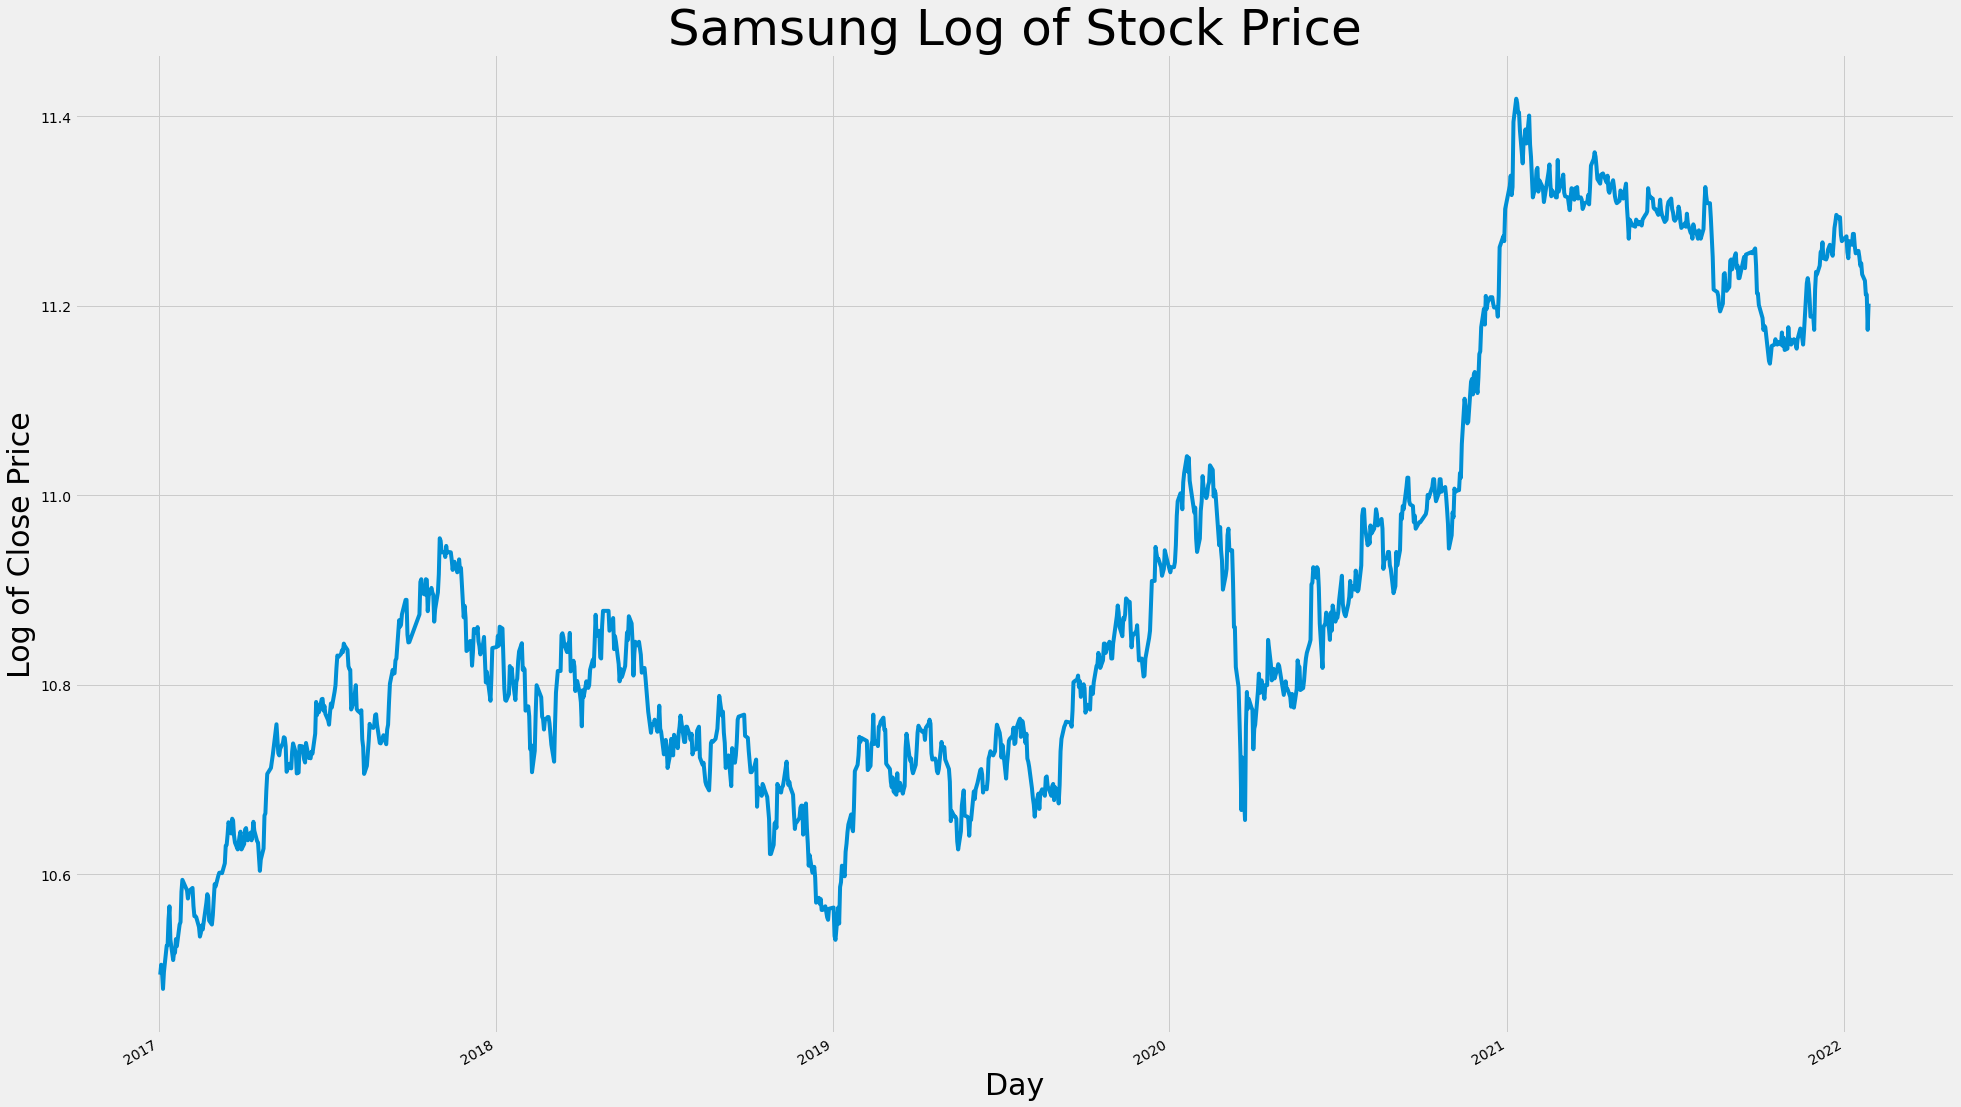

In [7]:
fig, ax = plt.subplots(figsize=(30, 20))
samsung_df['log_close'].plot(ax=ax)
plt.title("Samsung Log of Stock Price",fontsize=50)
plt.xlabel('Day', fontsize=30)
plt.ylabel('Log of Close Price', fontsize=30)
plt.show()

In [8]:
train = samsung_df[:-30]
data_train = train['log_close'].to_numpy()
test = samsung_df[-30:]
data_test = test['log_close'].to_numpy()

# Transformer Encoder, Transformer Decoder

Transformer에서 사용할 수 있도록 WindowDataset Class를 구현하여 데이터 셋을 생성하였고, torch의 nn.transformer를 사용하여 모델링을 진행하였다.

## Dataset

Transformer 학습을 위해서는 input data와 output data가 필요하다. 시계열 예측을 위해 데이터의 일정한 길이의 input window, output window를 설정하고 데이터의 처음 부분부터 끝부분까지 Sliding 시켜서 데이터셋을 생성하였다.


![](https://doheon.github.io/assets/images/2021-08-04-ci-4.transformer-post.assets/image-20210730172930737.png)

In [9]:
from torch.utils.data import DataLoader, Dataset

class windowDataset(Dataset):
    def __init__(self, y, input_window=80, output_window=20, stride=5):
        #총 데이터의 개수
        L = y.shape[0]
        #stride씩 움직일 때 생기는 총 sample의 개수
        num_samples = (L - input_window - output_window) // stride + 1

        #input과 output
        X = np.zeros([input_window, num_samples])
        Y = np.zeros([output_window, num_samples])

        for i in np.arange(num_samples):
            start_x = stride*i
            end_x = start_x + input_window
            X[:,i] = y[start_x:end_x]

            start_y = stride*i + input_window
            end_y = start_y + output_window
            Y[:,i] = y[start_y:end_y]

        X = X.reshape(X.shape[0], X.shape[1], 1).transpose((1,0,2))
        Y = Y.reshape(Y.shape[0], Y.shape[1], 1).transpose((1,0,2))
        self.x = X
        self.y = Y
        
        self.len = len(X)
    def __getitem__(self, i):
        return self.x[i], self.y[i, :-1], self.y[i,1:]
    def __len__(self):
        return self.len

input window를 모델의 input으로, output window를 모델의 output으로 사용한다.


이 프로젝트에서는 input window를 252일(주식 영업일 기준 1년 영업일), output window를 5일(Intraday)로 하여 예측을 진행하였다. Stride를 1로 설정하여 Transformer가 252+5의 window를 1만큼 움직이면서 예측을 진행하도록 설계하였다.

In [10]:
iw = 252
ow = 5

train_dataset = windowDataset(data_train, input_window=iw, output_window=ow, stride=1)
train_loader = DataLoader(train_dataset, batch_size=64)

# Transformer

In [11]:
from torch.nn import Transformer
from torch import nn
import torch
import math

class TFModel(nn.Module):
    def __init__(self,d_model, nhead, nhid, nlayers, dropout=0.5):
        super(TFModel, self).__init__()
        self.transformer = Transformer(d_model=d_model, nhead=nhead, dim_feedforward=nhid, num_encoder_layers=nlayers, num_decoder_layers=nlayers,dropout=dropout)
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.pos_encoder_d = PositionalEncoding(d_model, dropout)
        self.linear = nn.Linear(d_model, 1)
        self.encoder = nn.Linear(1, d_model)
        self.encoder_d = nn.Linear(1, d_model)

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src, tgt, srcmask, tgtmask):
        src = self.encoder(src)
        src = self.pos_encoder(src)

        tgt = self.encoder_d(tgt)
        tgt = self.pos_encoder_d(tgt)
        output = self.transformer(src.transpose(0,1), tgt.transpose(0,1), srcmask, tgtmask)
        output = self.linear(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

def gen_attention_mask(x):
    mask = torch.eq(x, 0)
    return mask

# Training

**Parameter**
- Learning Rate : 0.001

**Model Input**
- D_k(Query, Key, Value Vector의 차원) : 256
- Number of Attention Head : 8
- Number of Hidden Layer : 256
- Number of Layers : 2
- Drop out Rate : 0.1

**Loss Function**
MSELoss()

**Optimizer**
torch.optim.Adam

In [12]:
device = torch.device("cuda")

lr = 1e-3
model = TFModel(256, 8, 256, 2, 0.1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [13]:
epoch = 1000
from tqdm import tqdm

model.train()
progress = tqdm(range(epoch))
for i in progress:
    batchloss = 0.0
    
    for (inputs, dec_inputs, outputs) in train_loader:
        optimizer.zero_grad()
        src_mask = model.generate_square_subsequent_mask(inputs.shape[1]).to(device)
        tgt_mask = model.generate_square_subsequent_mask(dec_inputs.shape[1]).to(device)

        result = model(inputs.float().to(device), dec_inputs.float().to(device), src_mask, tgt_mask)
        loss = criterion(result.permute(1,0,2), outputs.float().to(device))
        
        loss.backward()
        optimizer.step()
        batchloss += loss
    progress.set_description("{:0.5f}".format(batchloss.cpu().item() / len(train_loader)))

0.09440: 100%|██████████████████████████████| 1000/1000 [12:44<00:00,  1.31it/s]


# Evaluation

학습된 모델을 이용해서 실제로 마지막 30일의 데이터를 예측해보았다.

Input Data로 Train Data의 마지막 2주일 데이터를 사용하고, Decoder의 Input으로는 Train Data의 마지막 값을 사용하였다. 다음 값을 예측하는 과정을 예측할 길이만큼 반복하면서 Output을 Update하였다. 최종적으로 원하는 길이만큼 예측을 완료하면 최종값을 Return하는 evaluate 함수를 구현하였다.

In [14]:
def evaluate(length):
    input = torch.tensor(data_train[-252:]).reshape(1,-1,1).to(device).float().to(device)
    output = torch.tensor(data_train[-1].reshape(1,-1,1)).float().to(device)
    model.eval()
    for i in range(length):
        src_mask = model.generate_square_subsequent_mask(input.shape[1]).to(device)
        tgt_mask = model.generate_square_subsequent_mask(output.shape[1]).to(device)

        predictions = model(input, output, src_mask, tgt_mask).transpose(0,1)
        predictions = predictions[:, -1:, :]
        output = torch.cat([output, predictions.to(device)], axis=1)
    return torch.squeeze(output, axis=0).detach().cpu().numpy()[1:]

In [22]:
result = evaluate(30)
real = samsung_df["log_close"].to_numpy()

In [23]:
result

array([[11.079176],
       [11.079175],
       [11.079173],
       [11.079173],
       [11.079173],
       [11.079173],
       [11.079173],
       [11.079174],
       [11.079173],
       [11.079175],
       [11.079173],
       [11.079173],
       [11.079175],
       [11.079173],
       [11.079173],
       [11.079174],
       [11.079175],
       [11.079175],
       [11.079175],
       [11.079176],
       [11.079174],
       [11.079175],
       [11.079175],
       [11.079174],
       [11.079174],
       [11.079173],
       [11.079174],
       [11.079174],
       [11.079174],
       [11.079174]], dtype=float32)

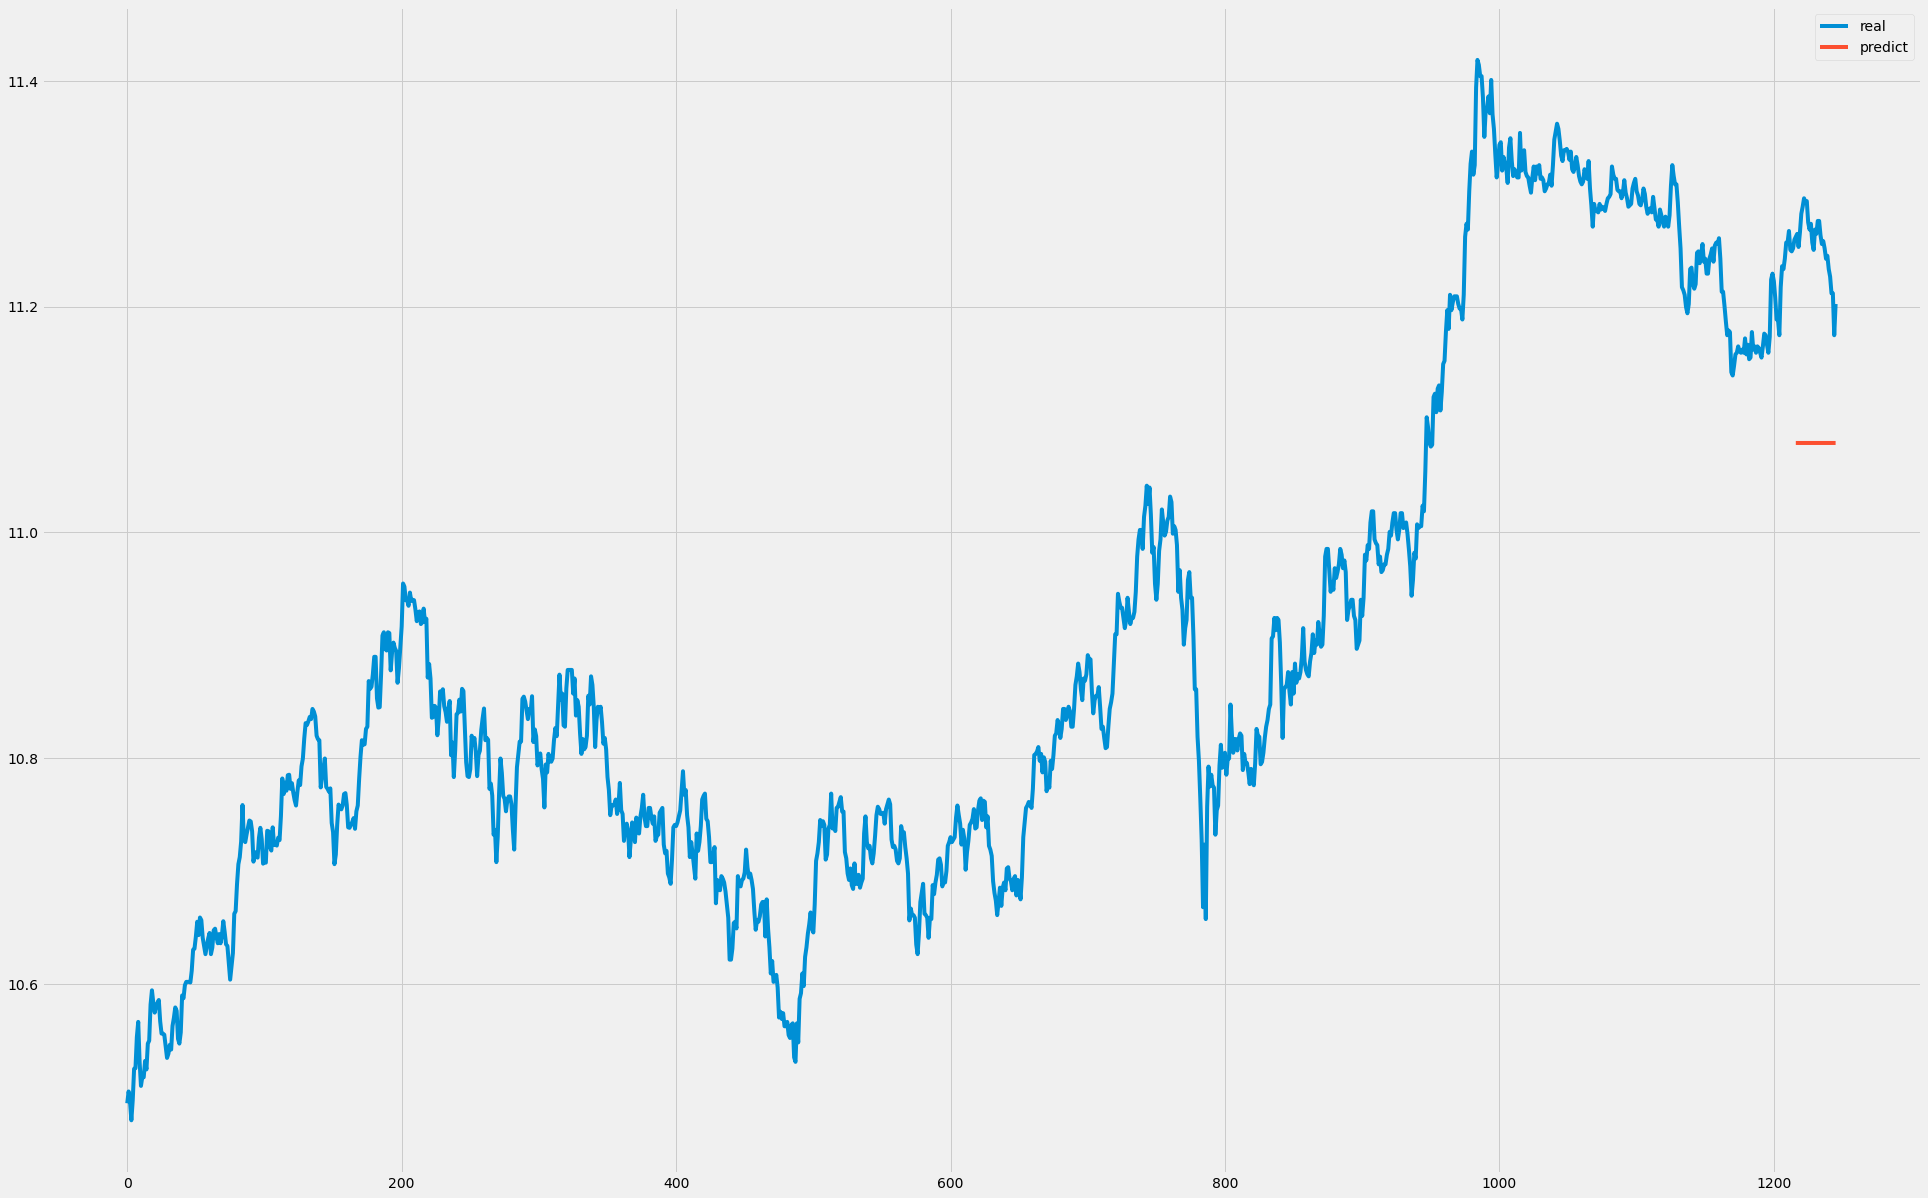

In [26]:
plt.figure(figsize=(30,20))
plt.plot(real[:], label="real")
plt.plot(range(1246-30, 1246),result[:], label="predict")
plt.legend()
plt.show()

최종적으로 예측한 결과는 위와 같았다. 결과를 보면 의미 있는 값을 전혀 예측하지 못하고 있으며, 값의 변화가 거의 없는 것을 확인할 수 있다. 여러 파라미터를 바꾸어보면서 학습을 진행해보아도 비슷한 결과가 나왔으며, 모델이 전혀 예측을 하지 못하고 있다고 판단되었다.

결과를 개선하기 위해서 Decoder에서 결과를 반복적으로 1 Step만큼 예측하는 것이 아니라 FC Layer를 통해 한번에 예측하는 방식으로 모델을 다시 구현해보았다.

# Transformer Encoder, FC Layer Decoder

예측해야할 step의 수가 많기 때문에 1step씩 결과를 예측하는 모델로는 좋은 결과를 얻어내지 못했다. 따라서 Encoder의 Output에서 FC Layer를 통해 모든 결과를 한번에 예측하는 모델로 다시 시계열 예측을 시도해보았다.

In [12]:
from torch.utils.data import DataLoader, Dataset

class windowDataset2(Dataset):
    def __init__(self, y, input_window=80, output_window=20, stride=5):
        #총 데이터의 개수
        L = y.shape[0]
        #stride씩 움직일 때 생기는 총 sample의 개수
        num_samples = (L - input_window - output_window) // stride + 1

        #input과 output
        X = np.zeros([input_window, num_samples])
        Y = np.zeros([output_window, num_samples])

        for i in np.arange(num_samples):
            start_x = stride*i
            end_x = start_x + input_window
            X[:,i] = y[start_x:end_x]

            start_y = stride*i + input_window
            end_y = start_y + output_window
            Y[:,i] = y[start_y:end_y]

        X = X.reshape(X.shape[0], X.shape[1], 1).transpose((1,0,2))
        Y = Y.reshape(Y.shape[0], Y.shape[1], 1).transpose((1,0,2))
        self.x = X
        self.y = Y
        
        self.len = len(X)
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    def __len__(self):
        return self.len

In [13]:
iw = 252
ow = 5

train_dataset = windowDataset(data_train, input_window=iw, output_window=ow, stride=1)
train_loader = DataLoader(train_dataset, batch_size=64)

In [14]:
class FCTFModel(nn.Module):
    def __init__(self,iw, ow, d_model, nhead, nlayers, dropout=0.5):
        super(FCTFModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=nlayers) 
        self.pos_encoder = PositionalEncoding(d_model, dropout)

        self.encoder = nn.Sequential(
            nn.Linear(1, d_model//2),
            nn.ReLU(),
            nn.Linear(d_model//2, d_model)
        )
        
        self.linear =  nn.Sequential(
            nn.Linear(d_model, d_model//2),
            nn.ReLU(),
            nn.Linear(d_model//2, 1)
        )

        self.linear2 = nn.Sequential(
            nn.Linear(iw, (iw+ow)//2),
            nn.ReLU(),
            nn.Linear((iw+ow)//2, ow)
        ) 

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def forward(self, src, srcmask):
        src = self.encoder(src)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src.transpose(0,1), srcmask).transpose(0,1)
        output = self.linear(output)[:,:,0]
        output = self.linear2(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

def gen_attention_mask(x):
    mask = torch.eq(x, 0)
    return mask

다음과 순서로 진행되도록 모델링하였다.

- 1차원 벡터를 d_model 차원으로 바꿔준다.
(batch, input_window, 1) => (batch, input_window, d_model)

- transformer encoder를 통과한다.
(batch, input_window, d_model) => (batch, input_window, d_model)

- 결과의 d_model차원을 1차원으로 바꿔준다.
(batch, input_window, d_model) => (batch, input_window, 1)

- 1차원인 부분을 없앤다.
(batch, input_window, 1) => (batch, input_window)

- input_window 차원을 output_window 차원으로 바꿔준다.
(batch, input_window) => (batch, output_window)

Input Window의 Attention 조합으로 Output Window를 바로 예측할 수 있을 것이라는 가정으로 모델링하였으며, Encoder와 FC Layer 사이에 Linear Layer를 2개씩 쌓았다.

## Training


**Parameter**
- Learning Rate : 0.001

**Model Input**
- Input Window : 252
- Output Window : 5
- D_k(Query, Key, Value Vector의 차원) : 512
- Number of Attention Head : 8
- Number of Layers : 4
- Drop out Rate : 0.1

**Loss Function**
MSELoss()

**Optimizer**
torch.optim.Adam

In [15]:
iw = 252
ow = 5

train_dataset = windowDataset2(data_train, input_window=iw, output_window=ow, stride=1)
train_loader = DataLoader(train_dataset, batch_size=32)

In [16]:
device = torch.device("cuda")
lr = 1e-3
model = FCTFModel(252, 5, 64, 4, 2, 0.1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [17]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [18]:
from tqdm import tqdm

epoch = 1000
model.train()
progress = tqdm(range(epoch))
for i in progress:
    batchloss = 0.0
    for (inputs, outputs) in train_loader:
        optimizer.zero_grad()
        src_mask = model.generate_square_subsequent_mask(inputs.shape[1]).to(device)
        result = model(inputs.float().to(device),  src_mask)
        loss = criterion(result, outputs[:,:,0].float().to(device))
        loss.backward()
        optimizer.step()
        batchloss += loss
    progress.set_description("loss: {:0.6f}".format(batchloss.cpu().item() / len(train_loader)))

loss: 0.076976: 100%|███████████████████████| 1000/1000 [09:39<00:00,  1.72it/s]


## Evaluation

In [22]:
def evaluate():
    input = torch.tensor(data_train[-252:]).reshape(1,-1,1).to(device).float().to(device)
    model.eval()
    
    src_mask = model.generate_square_subsequent_mask(input.shape[1]).to(device)
    predictions = model(input, src_mask)
    return predictions.detach().cpu().numpy()

In [27]:
result = evaluate()
real = samsung_df["log_close"].to_numpy()

In [30]:
len(real)

1246

In [36]:
result[:][0]

array([11.702   , 11.707314, 11.702831, 11.712421, 11.708553],
      dtype=float32)

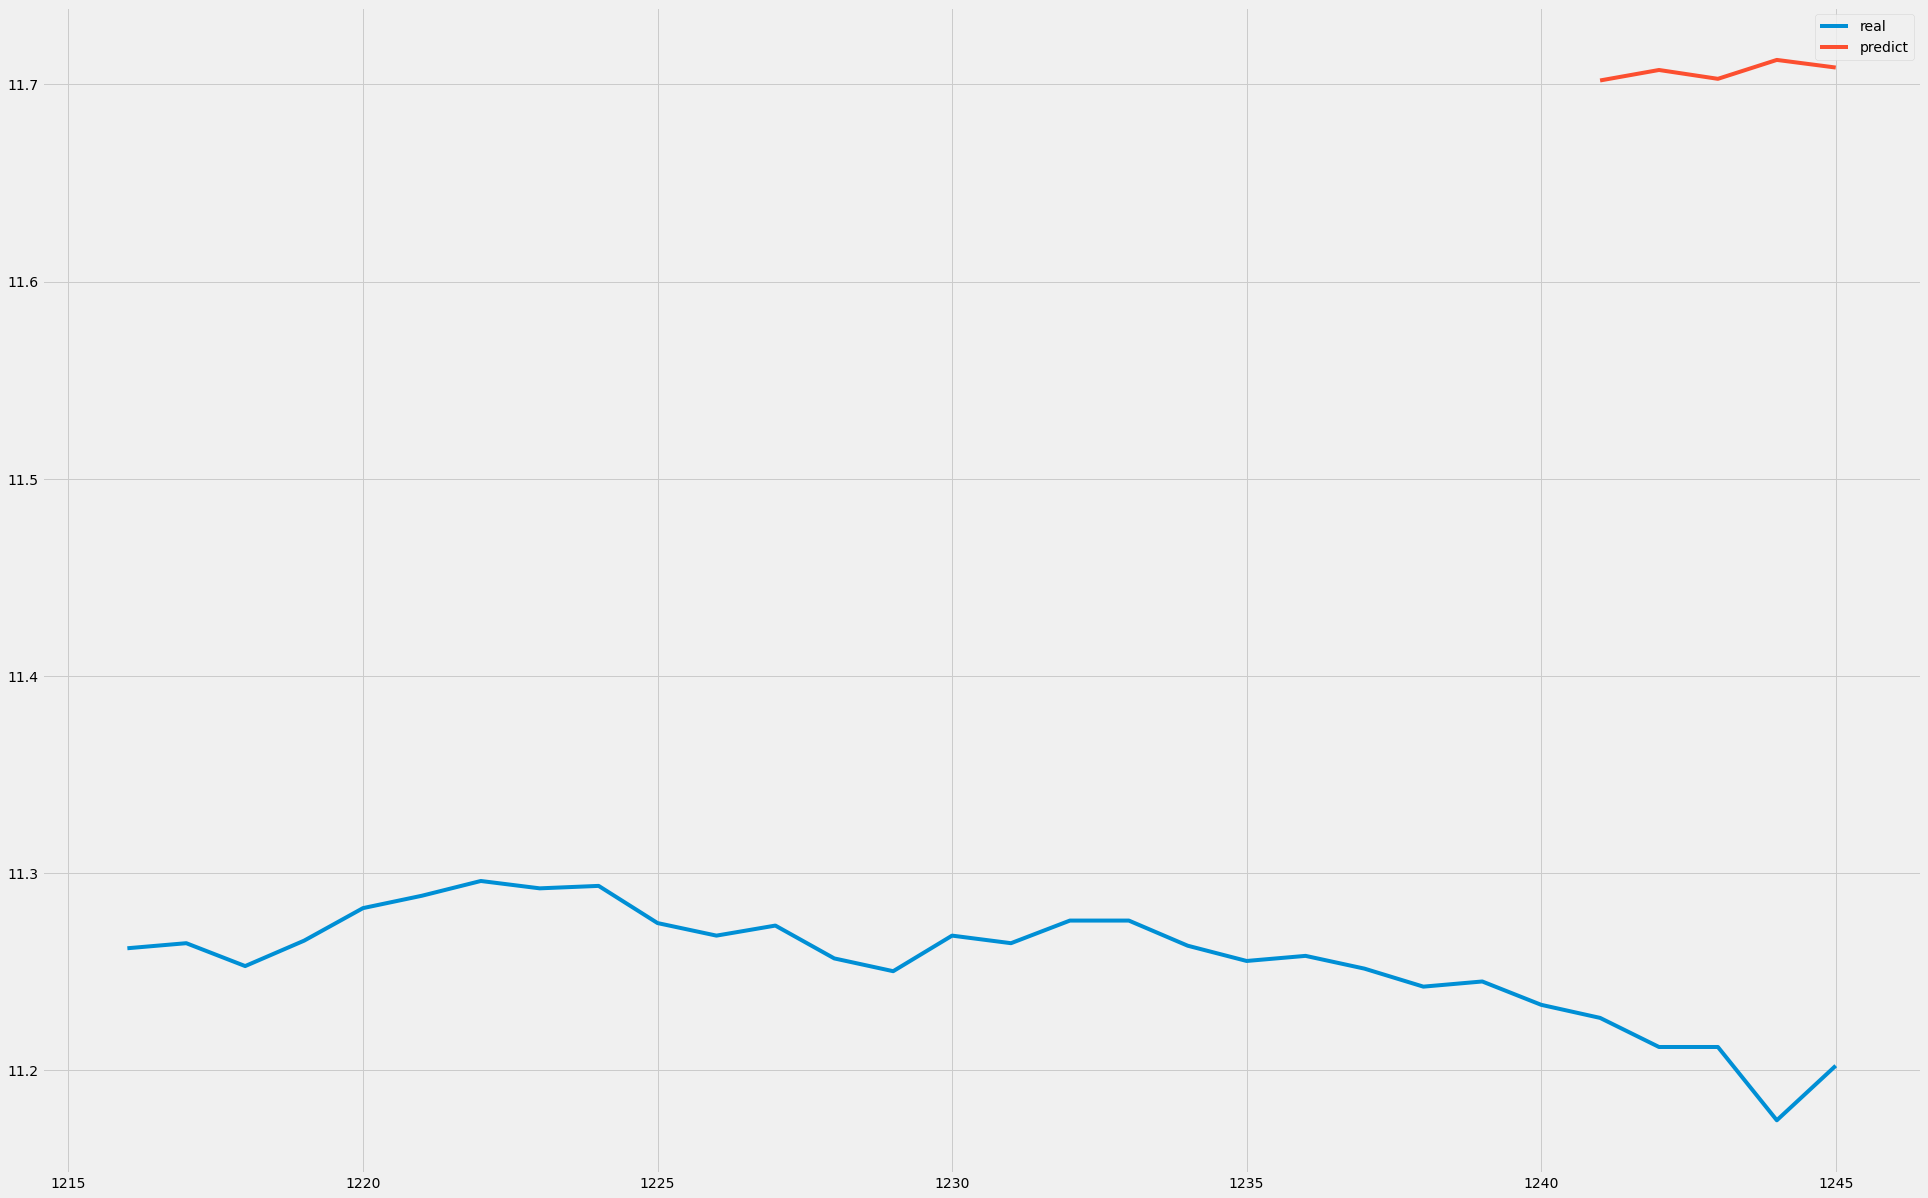

In [37]:
plt.figure(figsize=(30,20))
plt.plot(range(1246-30, 1246), real[1246-30:1246], label="real")
plt.plot(range(1246-5, 1246), result[:][0], label="predict")
plt.legend()
plt.show()

## Scoring

In [39]:
def MAPE(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE(result, real[1246-5:1246])

4.4730086655265255

# Conclusion

최근에 자연어 처리에서 매우 뛰어난 성능을 보여주고 있는 **Transformer**를 이용해서 시계열 예측을 진행해본 결과 transformer decoder를 사용했을 때는 좋은 결과를 얻지 못했지만 FC layer decoder를 사용했을 때는 MAPE 4.473의 나쁘지 않은 성능을 확인할 수 있었다.

다만 자연어 처리에서 사용되는 Transformer 모델을 Time Series Forecasting(Regression) 문제에 그대로 사용하려다 보니 모델의 성능 저하가 있었던 것으로 예상된다.

Transformer Based Model인 TFT가 Interpretable한 Time Series Forecasting 문제에서 SOTA인바, Time Series Transformer(TST), Informer, TFT를 구현하고 실험해봐야겠다.